In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [5]:
# importing file

df = pd.read_csv('google_cleaned.csv')

In [6]:
df.isnull().sum().sum()

3180

In [7]:
df.isna().sum().sort_values(ascending=False)

Size              1695
Rating            1474
Current Ver          8
Android Ver          2
Type                 1
App                  0
Category             0
Reviews              0
Installs             0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Day                  0
Month                0
Year                 0
dtype: int64

In [8]:
df.shape

(10840, 16)

In [11]:
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,26,2,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,NaN,10000000,Free,0.0,Everyone,Productivity,2018-04-06,Varies with device,Varies with device,6,4,2018
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,NaN,1000000,Free,0.0,Everyone,Productivity,2018-08-06,Varies with device,Varies with device,6,8,2018
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,NaN,100000000,Free,0.0,Everyone,Productivity,2018-06-27,Varies with device,Varies with device,27,6,2018
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86.0,10000,Free,0.0,Everyone,Medical,2018-06-01,0.6.88,5.0 and up,1,6,2018


In [12]:
df = df.drop_duplicates()

In [14]:
df.shape

(10357, 16)

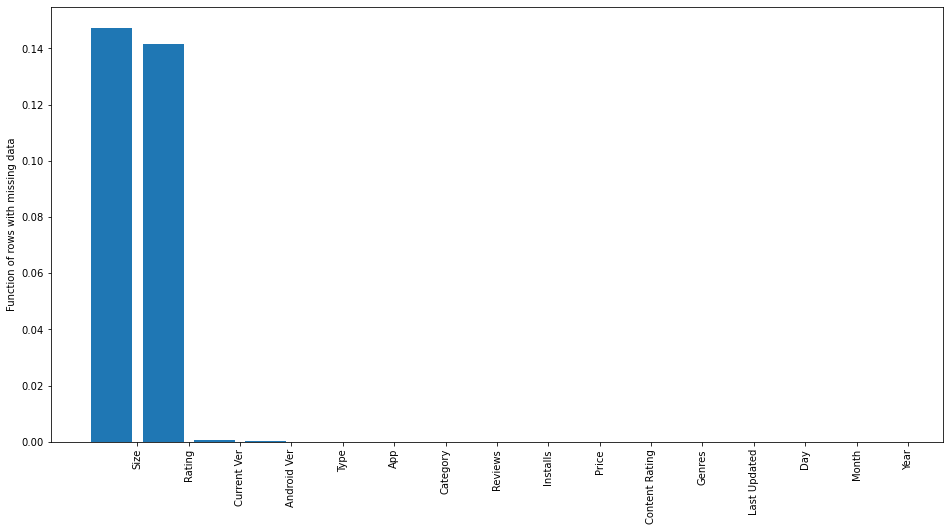

In [15]:
# Percentage count of null values

null_counts = df.isna().sum().sort_values(ascending=False)/len(df)
plt.figure(figsize=(16, 8))
plt.xticks(np.arange(len(null_counts))+0.5, null_counts.index, rotation='vertical')
plt.ylabel('Function of rows with missing data')
plt.bar(np.arange(len(null_counts)), null_counts)
plt.show()

In [17]:
df_copy = df.copy()

In [18]:
cols = [var for var in df_copy.columns if df_copy[var].isnull().mean()*100]

In [19]:
cols

['Rating', 'Size', 'Type', 'Current Ver', 'Android Ver']

In [20]:
df_copy["Installs"].isnull().mean()*100

0.0

In [22]:
df_copy["Rating"].isnull().mean()*100

14.145022689968137

In python any numeric(greater than 0 or less than 0 but not 0) value will be true 

In [24]:
cols

['Rating', 'Size', 'Type', 'Current Ver', 'Android Ver']

In [25]:
# Columns having null value

df_copy[cols]

,Rating,Size,Type,Current Ver,Android Ver
0,4.1,19.0,Free,1.0.0,4.0.3 and up
1,3.9,14.0,Free,2.0.0,4.0.3 and up
2,4.7,8.7,Free,1.2.4,4.0.3 and up
3,4.5,25.0,Free,Varies with device,4.2 and up
4,4.3,2.8,Free,1.1,4.4 and up
...,...,...,...,...,...
10835,4.5,53.0,Free,1.48,4.1 and up
10836,5.0,3.6,Free,1.0,4.1 and up
10837,NaN,9.5,Free,1.0,2.2 and up
10838,4.5,NaN,Free,Varies with device,Varies with device


In [27]:
drop_df = df_copy[cols].dropna()

In [29]:
df_copy.shape

(10357, 16)

In [30]:
drop_df.shape

(7418, 5)

<AxesSubplot:xlabel='Rating', ylabel='Density'>

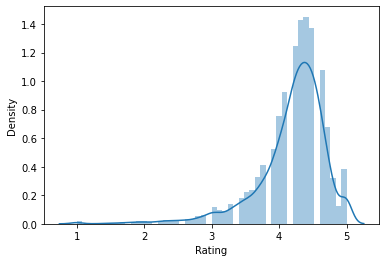

In [32]:
sns.distplot(df_copy['Rating'])

<AxesSubplot:xlabel='Rating', ylabel='Density'>

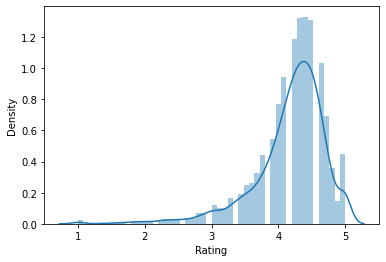

In [33]:
sns.distplot(drop_df['Rating'])

### Mean, Median, Mode

In [34]:
df_mean_median = df.copy()

In [36]:
df_mean_median['Size'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10835    False
10836    False
10837    False
10838     True
10839    False
Name: Size, Length: 10357, dtype: bool

In [37]:
df_mean_median['Size'].fillna(df_mean_median['Size'].mean())

0        19.000000
1        14.000000
2         8.700000
3        25.000000
4         2.800000
           ...    
10835    53.000000
10836     3.600000
10837     9.500000
10838    21.277437
10839    19.000000
Name: Size, Length: 10357, dtype: float64

In [38]:
df_mean_median['Size'].fillna(df_mean_median['Size'].median())

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10835    53.0
10836     3.6
10837     9.5
10838    13.0
10839    19.0
Name: Size, Length: 10357, dtype: float64

<AxesSubplot:xlabel='Size', ylabel='Count'>

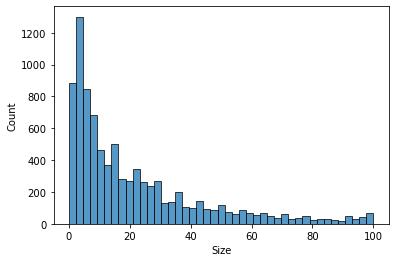

In [40]:
## To check the distribution of the data

sns.histplot(df['Size'])

<AxesSubplot:xlabel='Size', ylabel='Count'>

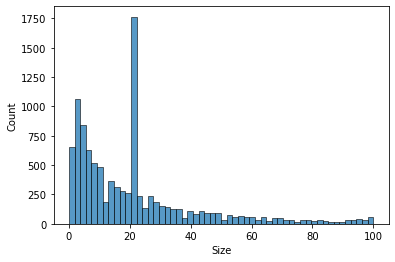

In [41]:
sns.histplot(df_mean_median['Size'].fillna(df_mean_median['Size'].mean()))

<AxesSubplot:xlabel='Size', ylabel='Density'>

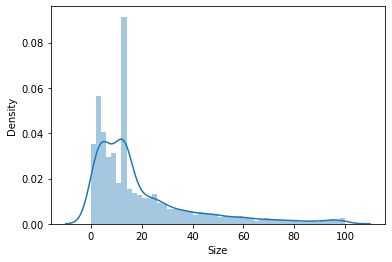

In [43]:
sns.distplot(df_mean_median['Size'].fillna(df_mean_median['Size'].median()))

In [44]:
## Distribution of the data

### Random samle impution to handle missing values

In [45]:
df_random = df.copy()

In [48]:
df_random['Size'].isnull().sum()

1526

In [51]:
random_sample = df_random['Size'].dropna().sample(df_random['Size'].isnull().sum())

In [54]:
random_sample.index = df_random[df_random['Size'].isnull()].index

In [55]:
df_random.loc[df_random['Size'].isnull(), "Size"] = random_sample